#Communities and Crime Unnormalized Data Set


The dataset contains 2215 records and 147 columns. Each record corresponds to a different community within United States. In addition to the Community Name, and State, there are columns for county and community codes. 

The rest of the data has numeric values representinting various demographic descriptions of each community.


Source: https://archive.ics.uci.edu/ml/datasets/Communities+and+Crime+Unnormalized#

### I would like to research the rate of total number of violent crimes per 100K popuation

In [1]:
#load python packages
import os
import pandas as pd
import datetime
import seaborn as sns

import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from pandas_profiling import ProfileReport
from urllib.request import urlretrieve



In [2]:
dfColInfo = pd.read_csv('data/CommAndCrimeColInfo.csv', index_col=0)
dfColInfo

,description
communityname,Community name - not predictive - for informat...
state,US state (by 2 letter postal abbreviation)(nom...
countyCode,"numeric code for county - not predictive, and ..."
communityCode,numeric code for community - not predictive an...
fold,fold number for non-random 10 fold cross valid...
...,...
autoTheftPerPop,number of auto thefts per 100K population (num...
arsons,number of arsons in 1995 (numeric - expected t...
arsonsPerPop,number of arsons per 100K population (numeric ...
ViolentCrimesPerPop,total number of violent crimes per 100K popuat...


In [3]:
#Database URL
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00211/CommViolPredUnnormalizedData.txt'
df = pd.read_csv(url, header=None, names=dfColInfo.index.values)

In [4]:
df.head()

,communityname,state,countyCode,communityCode,fold,population,householdsize,racepctblack,racePctWhite,racePctAsian,...,burglaries,burglPerPop,larcenies,larcPerPop,autoTheft,autoTheftPerPop,arsons,arsonsPerPop,ViolentCrimesPerPop,nonViolPerPop
0,BerkeleyHeightstownship,NJ,39,5320,1,11980,3.10,1.37,91.78,6.50,...,14,114.85,138,1132.08,16,131.26,2,16.41,41.02,1394.59
1,Marpletownship,PA,45,47616,1,23123,2.82,0.80,95.57,3.44,...,57,242.37,376,1598.78,26,110.55,1,4.25,127.56,1955.95
2,Tigardcity,OR,?,?,1,29344,2.43,0.74,94.33,3.43,...,274,758.14,1797,4972.19,136,376.3,22,60.87,218.59,6167.51
3,Gloversvillecity,NY,35,29443,1,16656,2.40,1.70,97.35,0.50,...,225,1301.78,716,4142.56,47,271.93,?,?,306.64,?
4,Bemidjicity,MN,7,5068,1,11245,2.76,0.53,89.16,1.17,...,91,728.93,1060,8490.87,91,728.93,5,40.05,?,9988.79


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2215 entries, 0 to 2214
Columns: 147 entries, communityname to nonViolPerPop
dtypes: float64(75), int64(29), object(43)
memory usage: 2.5+ MB


In [6]:
df.nunique()/df.shape[0]

communityname          0.911061
state                  0.021670
countyCode             0.051919
communityCode          0.433409
fold                   0.004515
                         ...   
autoTheftPerPop        0.981038
arsons                 0.080813
arsonsPerPop           0.712415
ViolentCrimesPerPop    0.891196
nonViolPerPop          0.954402
Length: 147, dtype: float64

In [7]:
df.describe()

,fold,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,...,PctBornSameState,PctSameHouse85,PctSameCity85,PctSameState85,LandArea,PopDens,PctUsePubTrans,LemasPctOfficDrugUn,murders,murdPerPop
count,2215.000000,2.215000e+03,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,...,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000
mean,5.494357,5.311798e+04,2.707327,9.335102,83.979819,2.670203,7.950176,14.445837,27.644840,13.975142,...,61.539630,51.538596,77.411079,88.111865,27.419955,2783.835034,3.041124,0.980163,7.764786,5.859296
std,2.872924,2.046203e+05,0.334120,14.247156,16.419080,4.473843,14.589832,4.518623,6.181517,5.970747,...,16.750061,10.517926,10.878186,7.287836,109.822600,2828.993341,4.912917,2.877128,58.166468,9.156829
min,1.000000,1.000500e+04,1.600000,0.000000,2.680000,0.030000,0.120000,4.580000,9.380000,4.640000,...,6.750000,11.830000,27.950000,32.830000,0.900000,10.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,1.436600e+04,2.500000,0.860000,76.320000,0.620000,0.930000,12.250000,24.415000,11.320000,...,50.110000,44.995000,72.060000,85.200000,7.300000,1181.900000,0.360000,0.000000,0.000000,0.000000
50%,5.000000,2.279200e+04,2.660000,2.870000,90.350000,1.230000,2.180000,13.620000,26.780000,12.540000,...,64.490000,52.170000,79.490000,90.030000,13.700000,2027.300000,1.220000,0.000000,1.000000,2.170000
75%,8.000000,4.302400e+04,2.850000,11.145000,96.225000,2.670000,7.810000,15.360000,29.205000,14.345000,...,74.855000,58.740000,85.135000,93.010000,26.100000,3321.700000,3.365000,0.000000,3.000000,8.365000
max,10.000000,7.322564e+06,5.280000,96.670000,99.630000,57.460000,95.290000,54.400000,70.510000,63.620000,...,93.140000,78.560000,96.590000,99.900000,3569.800000,44229.900000,54.330000,48.440000,1946.000000,91.090000


(array([300.,  79.,  79.,  80.,  81.,  81.,  82.,  80.,  81.,  79.,  80.,
         79.,  78.,  80.,  80.,  79.,  80.,  81.,  79.,  81.,  79.,  79.,
         80.,  79.,  79.]),
 array([   0.  ,   78.92,  157.84,  236.76,  315.68,  394.6 ,  473.52,
         552.44,  631.36,  710.28,  789.2 ,  868.12,  947.04, 1025.96,
        1104.88, 1183.8 , 1262.72, 1341.64, 1420.56, 1499.48, 1578.4 ,
        1657.32, 1736.24, 1815.16, 1894.08, 1973.  ]),
 <a list of 25 Patch objects>)

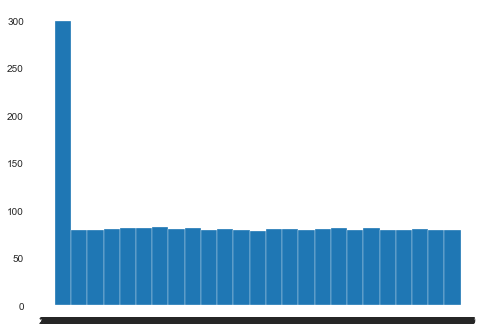

In [8]:
plt.hist(df['ViolentCrimesPerPop'], bins = 25)